In [1]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

data = pd.read_csv("/content/drive/MyDrive/CS235-Predict-Covid-Spread/[Cleaned] Forecasting Data/traineditted.csv")

data.rename(columns = {' Change in Active':'Change in Active'}, inplace = True)

data[1000:1200]


# data.groupby(['Country'])['Change'] = data['Active']

# plt.hist(data[data['Deaths'] != 0]['Deaths'])
# plt.hist(data[data['Deaths'] != 0]['Deaths'])

,Unnamed: 0,Country,Date,Confirmed,Deaths,Recovered,Active,Change in Active
1000,1000,Bolivia,2020-01-22,0,0,0,0,0
1001,1001,Bolivia,2020-01-23,0,0,0,0,0
1002,1002,Bolivia,2020-01-24,0,0,0,0,0
1003,1003,Bolivia,2020-01-25,0,0,0,0,0
1004,1004,Bolivia,2020-01-26,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1195,1195,Brazil,2020-03-07,13,0,0,13,0
1196,1196,Brazil,2020-03-08,20,0,0,20,7
1197,1197,Brazil,2020-03-09,25,0,0,25,5
1198,1198,Brazil,2020-03-10,31,0,0,31,6


In [92]:
import pandas as pd
from os.path import exists
import warnings
from datetime import date
import math
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Reading in files
train = pd.read_csv('/content/drive/MyDrive/CS235-Predict-Covid-Spread/[Cleaned] Forecasting Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CS235-Predict-Covid-Spread/[Cleaned] Forecasting Data/train.csv')

train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)

def date_to_int(d):
    initial_date = date(2020, 1, 21)
    curr_date = [int(x) for x in d.split('-')]
    final_date = date(curr_date[0], curr_date[1], curr_date[2])
    delta = final_date - initial_date
    return delta.days

countries = pd.unique(train['Country'])

# Feature Engineering - One hot encoding for country and Numeric Day value
one_hot_train = pd.get_dummies(train['Country'])
train = train.join(one_hot_train)
train['Day'] = train['Date'].apply(lambda x: date_to_int(x))

one_hot_test = pd.get_dummies(test['Country'])
test = test.join(one_hot_train)
test['Day'] = test['Date'].apply(lambda x: date_to_int(x))

# Outcome Log Transformation
train['log_Confirmed'] = train['Confirmed'].apply(lambda x: round(math.log(x+1),3))
train['log_Deaths'] = train['Deaths'].apply(lambda x: round(math.log(x+1),3))
train['log_Recovered'] = train['Recovered'].apply(lambda x: round(math.log(x+1),3))
train['log_Active'] = train['Active'].apply(lambda x: round(math.log(x+1),3))

test['log_Confirmed'] = test['Confirmed'].apply(lambda x: round(math.log(x+1),3))
test['log_Deaths'] = test['Deaths'].apply(lambda x: round(math.log(x+1),3))
test['log_Recovered'] = test['Recovered'].apply(lambda x: round(math.log(x+1),3))
test['log_Active'] = test['Active'].apply(lambda x: round(math.log(x+1),3))

In [93]:
train['Country']
# Preparing vectorized features to input into model
# train.drop(train.iloc[:, 0:6], inplace = True, axis = 1)
# test.drop(test.iloc[:, 0:6], inplace = True, axis = 1)

0              Afghanistan
1                  Albania
2                  Algeria
3                  Andorra
4                   Angola
               ...        
9345    West Bank and Gaza
9346        Western Sahara
9347                 Yemen
9348                Zambia
9349              Zimbabwe
Name: Country, Length: 9350, dtype: object

In [94]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split

train['confirmed_ranges'] = pd.qcut(train[train['log_Confirmed'] != 0]['log_Confirmed'], q=5, duplicates='drop', labels=[1,2,3,4])
train['confirmed_ranges'] = train['confirmed_ranges'].astype('float64')
train['confirmed_ranges'].fillna(value=0, inplace=True)
train['confirmed_ranges'] = train['confirmed_ranges'].astype('int64')

train['recovered_ranges'] = pd.qcut(train[train['log_Recovered'] != 0]['log_Recovered'], q=5, duplicates='drop', labels=[1,2,3,4])
train['recovered_ranges'] = train['recovered_ranges'].astype('float64')
train['recovered_ranges'].fillna(value=0, inplace=True)
train['recovered_ranges'] = train['recovered_ranges'].astype('int64')

train['death_ranges'] = pd.qcut(train[train['log_Deaths'] != 0]['log_Deaths'], q=5, duplicates='drop', labels=[1,2,3,4])
train['death_ranges'] = train['death_ranges'].astype('float64')
train['death_ranges'].fillna(value=0, inplace=True)
train['death_ranges'] = train['death_ranges'].astype('int64')

train['active_ranges'] = pd.qcut(train[train['log_Active'] != 0]['log_Active'], q=5, duplicates='drop', labels=[1,2,3,4])
train['active_ranges'] = train['active_ranges'].astype('float64')
train['active_ranges'].fillna(value=0, inplace=True)
train['active_ranges'] = train['active_ranges'].astype('int64')


### Same for the Test data ##
test['confirmed_ranges'] = pd.qcut(test[test['log_Confirmed'] != 0]['log_Confirmed'], q=5, duplicates='drop', labels=[1,2,3,4])
test['confirmed_ranges'] = test['confirmed_ranges'].astype('float64')
test['confirmed_ranges'].fillna(value=0, inplace=True)
test['confirmed_ranges'] = test['confirmed_ranges'].astype('int64')

test['recovered_ranges'] = pd.qcut(test[test['log_Recovered'] != 0]['log_Recovered'], q=5, duplicates='drop', labels=[1,2,3,4])
test['recovered_ranges'] = test['recovered_ranges'].astype('float64')
test['recovered_ranges'].fillna(value=0, inplace=True)
test['recovered_ranges'] = test['recovered_ranges'].astype('int64')

test['death_ranges'] = pd.qcut(test[test['log_Deaths'] != 0]['log_Deaths'], q=5, duplicates='drop', labels=[1,2,3,4])
test['death_ranges'] = test['death_ranges'].astype('float64')
test['death_ranges'].fillna(value=0, inplace=True)
test['death_ranges'] = test['death_ranges'].astype('int64')

test['active_ranges'] = pd.qcut(test[test['log_Active'] != 0]['log_Active'], q=5, duplicates='drop', labels=[1,2,3,4])
test['active_ranges'] = test['active_ranges'].astype('float64')
test['active_ranges'].fillna(value=0, inplace=True)
test['active_ranges'] = test['active_ranges'].astype('int64')


In [95]:
# train['confirmed_ranges'] = pd.qcut(train[train['log_Confirmed'] != 0]['log_Confirmed'], q=6, duplicates='drop', labels=[2, 3, 4, 5, 6])
# train['confirmed_ranges'] = train['confirmed_ranges'].astype('float64')
# train['confirmed_ranges'].fillna(value=1, inplace=True)
# train['confirmed_ranges'] = train['confirmed_ranges'].astype('int64')

# train['recovered_ranges'] = pd.qcut(train[train['log_Recovered'] != 0]['log_Recovered'], q=6, duplicates='drop', labels=[2, 3, 4, 5, 6])
# train['recovered_ranges'] = train['recovered_ranges'].astype('float64')
# train['recovered_ranges'].fillna(value=1, inplace=True)
# train['recovered_ranges'] = train['recovered_ranges'].astype('int64')

# train['death_ranges'] = pd.qcut(train[train['log_Deaths'] != 0]['log_Deaths'], q=5, duplicates='drop', labels=[2, 3, 4, 5])
# train['death_ranges'] = train['death_ranges'].astype('float64')
# train['death_ranges'].fillna(value=1, inplace=True)
# train['death_ranges'] = train['death_ranges'].astype('int64')

# train['active_ranges'] = pd.qcut(train[train['log_Active'] != 0]['log_Active'], q=6, duplicates='drop', labels=[2, 3, 4, 5, 6])
# train['active_ranges'] = train['active_ranges'].astype('float64')
# train['active_ranges'].fillna(value=1, inplace=True)
# train['active_ranges'] = train['active_ranges'].astype('int64')

train.dtypes

Country              object
Date                 object
Confirmed             int64
Deaths                int64
Recovered             int64
                     ...   
log_Active          float64
confirmed_ranges      int64
recovered_ranges      int64
death_ranges          int64
active_ranges         int64
Length: 202, dtype: object

In [96]:
train1, valid1 = train_test_split(train, test_size=0.2, shuffle=False)
train1 = train1.sort_values(by=['Country', 'Day'])
train1[:200]

print(len(test), len(test[test['log_Recovered'] != 0]))

9350 913


In [97]:
 def learnmchain(X,order):
    letterCount = len(X)
    stateCount = max(X) + 1
    
    piShape = (stateCount, ) * order
    stateShape = (stateCount, ) * (order + 1)
    
    piProbability = np.zeros(piShape)
    stateMatrix = np.zeros(stateShape)  + 10**(-5)
    
    for index in range(len(X) - order):
        if order == 0:
            stateMatrix[X[index]] += 1
        else:   
            indeces = tuple(X[index:index + order + 1])

            piProbability[tuple(indeces[:order])] += 1
            stateMatrix[indeces] += 1
        
    if order != 0:
        piProbability[tuple(X[-order:])] += 1
    
    rowTotals = np.sum(stateMatrix.T, axis=0)
    
    
    stateMatrix = (stateMatrix.T / rowTotals).T
    piProbability = piProbability / (letterCount - order + 1)
    
    return piProbability, stateMatrix, order


In [98]:
def sample(theta,n, init):
    predicted = []
    initialProbability = theta[0]
    tranisitionMatrix = theta[1]
    order = theta[2]
    flattenedInitialProbability = initialProbability.flatten()
    i = order
    

    if(order != 0):
        predicted = init
    
    while i < n:
        currentPrediction = np.random.choice(len(tranisitionMatrix), p=tranisitionMatrix[tuple(predicted[i - order::])])
        
        predicted.append(currentPrediction)

        i += 1
        
    return predicted

In [99]:
import matplotlib.pyplot as plt

def getsubplots(n):
    plotrows = int(np.floor(np.sqrt(n)))
    plotcols = int(np.ceil(n/plotrows))

    fig,axs = plt.subplots(plotrows,plotcols)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    axs = axs.flatten()
    for ax in axs[n:]:
        ax.set_axis_off()
    return axs[:n]

def paramOptim(predictionColumn):
  total = 0
  bestOrder = 0
  bestAcc = 0

  for i in range(1, 7):
    total = 0
    mcorder = i

    theta = learnmchain(train1[predictionColumn], mcorder)

    for country in countries:
      currentValid = valid1[valid1[country] == 1]

      test = sample(theta, len(currentValid), list(train1[train1[country] == 1][predictionColumn][-mcorder:]))
      total += len(currentValid) - len(currentValid[test == currentValid[predictionColumn]])

    currentAcc = (len(valid1) - total) * 100 /len(valid1)

    if currentAcc > bestAcc:
      bestOrder = i
      bestAcc = currentAcc
    
    return bestOrder

def predict(predictionColumn, mcorder, targetData):
    axs = getsubplots(3)
    total = 0
    predicted = {}
    theta = learnmchain(train1[predictionColumn], mcorder)

    for i, country in enumerate(countries):
      currentValid = targetData[targetData[country] == 1]

      test = sample(theta, len(currentValid), list(train1[train1[country] == 1][predictionColumn][-mcorder:]))
      # predicted[country] = test
      if(i == 10 or i == 41 or i == 60):
        axs[i % 3].scatter(currentValid['Day'], test, color= "red", linewidths=0.5) #draw the scatter plot
        axs[i % 3].scatter(currentValid['Day'], currentValid[predictionColumn], color= "green") #put average for each category
      total += len(currentValid) - len(currentValid[test == currentValid[predictionColumn]])
      

    return (len(targetData) - total) * 100 /len(targetData)


Doing the tests:

confirmed_ranges 66.2566844919786
death_ranges 93.78609625668449
recovered_ranges 83.16577540106952
active_ranges 65.80748663101605


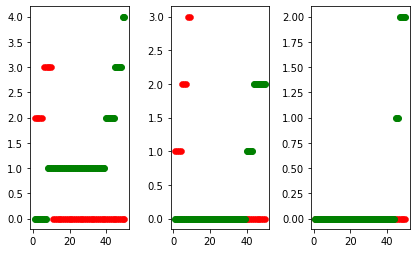

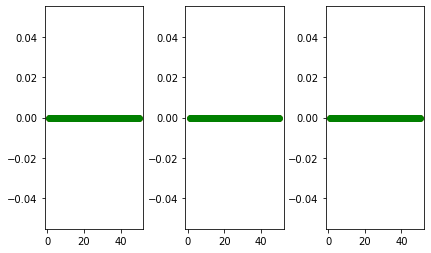

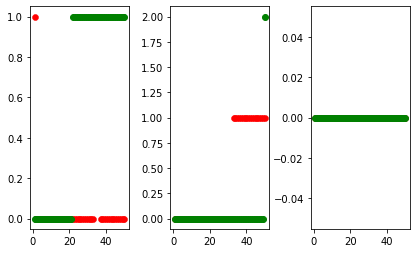

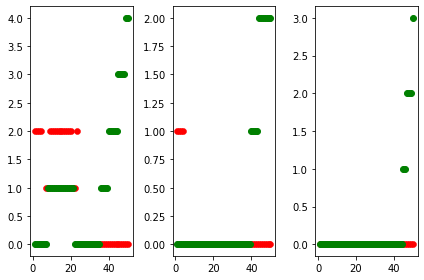

In [100]:
bestOrders = [(paramOptim('confirmed_ranges'), 'confirmed_ranges'), (paramOptim('death_ranges'), 'death_ranges'), (paramOptim('recovered_ranges'), 'recovered_ranges'), (paramOptim('active_ranges'), 'active_ranges')]

print("\nDoing the tests:\n")

#Do the test:
for element in bestOrders:
  print(element[1], predict(element[1], element[0], test))

plt.gcf().tight_layout()